In [1]:
#import all the required libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [2]:
#reading the given dataset
df = pd.read_csv(r'C:\Users\Varshith\OneDrive\Documents\codsoft\churn\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#let us visualize the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
#Data Preprocessing start from here
#let us check are there any null values in the given dataset
print("no.of null values : ",df.isnull().sum().sum())

no.of null values :  0


In [5]:
#there is no noise in dataset,therefore the dataset is clean
#letus label encode the categorical data
#we can remove the unwanted columns since we donot require the surname column for training we can ignore it
lbr = LabelEncoder()
df['Geography'] = lbr.fit_transform(df['Geography'])
df['Gender'] = lbr.fit_transform(df['Gender'])

In [6]:
#Feature Extraction
X = df.drop(['Exited','Surname'],axis=1)#features exculding the target and the unwanted column
Y = df['Exited']#target variable

In [7]:
#prerequisites for training the model
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("Y_train Shape: ",Y_train.shape)
print("Y_test Shape: ",Y_test.shape)

X_train Shape:  (8000, 12)
X_test Shape:  (2000, 12)
Y_train Shape:  (8000,)
Y_test Shape:  (2000,)


In [8]:
#training the using the random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

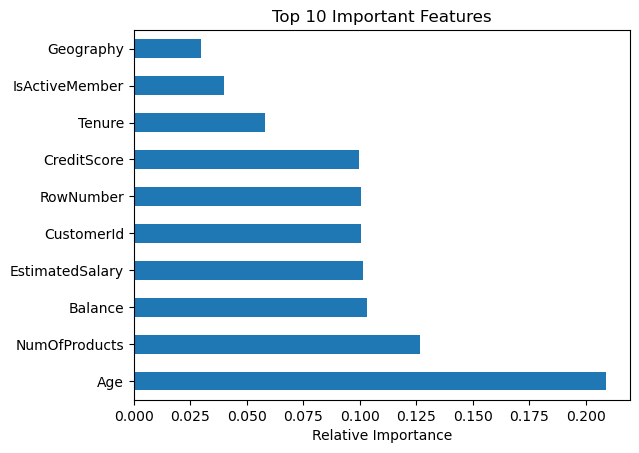

In [9]:
# Feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.xlabel('Relative Importance')
plt.show()

In [10]:
#let us produce the metrics of the model
#Accuracy of the model
acc = metrics.accuracy_score(y_pred,Y_test)
print(f"Accuracy of the model:{acc*100:.2f}%")

Accuracy of the model:86.35%


In [11]:
#Classification report of the model
report = metrics.classification_report(y_pred,Y_test)
print(report)
#confusion matrix of the model
mat = metrics.confusion_matrix(y_pred,Y_test)
print(mat)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1760
           1       0.46      0.75      0.57       240

    accuracy                           0.86      2000
   macro avg       0.71      0.81      0.74      2000
weighted avg       0.90      0.86      0.88      2000

[[1547  213]
 [  60  180]]


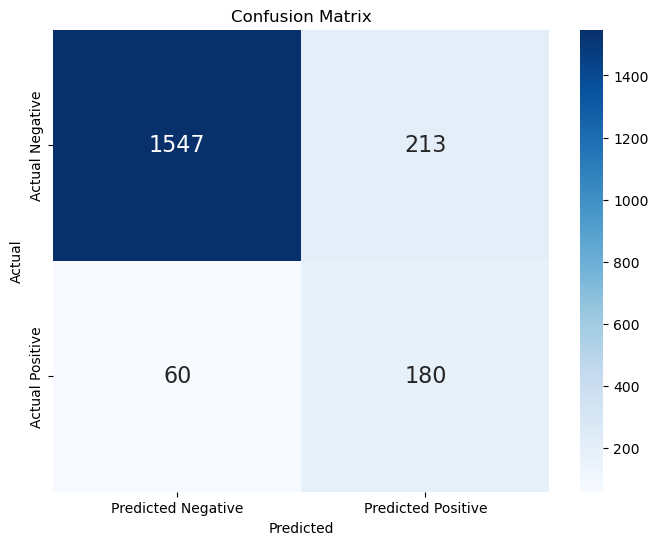

In [12]:
#let us visualize the confusion matrix
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, cmap='Blues', fmt='d', annot_kws={'size': 16}, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

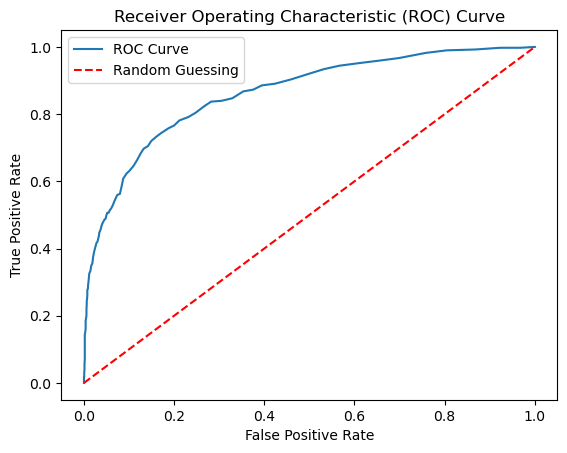

In [13]:
#let us generate the ROC-curve
# ROC curve
y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
